In [1]:
!pip install soundfile

In [2]:
import aifc
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import mlab, cm
import numpy as np
import pandas as pd
%matplotlib inline

In [13]:
# ReadAIFF function
def ReadAIFF(file):
# Reads the frames from the audio clip and returns the uncompressed data
    s = aifc.open(file,'r')
    nFrames = s.getnframes()
    strSig = s.readframes(nFrames)
    return np.fromstring(strSig, np.short).byteswap()

# Read one file as an example
params = {'NFFT':256, 'Fs':2000, 'noverlap':192} 
s = ReadAIFF('/content/extracted_calls1.aiff')
P, freqs, bins = mlab.specgram(s, **params)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


In [15]:
P

array([[1.45124679e+03, 4.03185210e+03, 1.01883140e+02, ...,
        1.96974434e+03, 8.65629860e+02, 4.14421001e+03],
       [4.37487778e+03, 4.87231705e+03, 3.28583674e+03, ...,
        4.38484170e+03, 3.92163121e+03, 5.15920577e+03],
       [6.13449667e+02, 5.62221488e+02, 3.18235782e+02, ...,
        5.31712541e+02, 4.33610550e+02, 7.06044745e+02],
       ...,
       [5.70668136e-02, 4.60873947e-02, 2.54080273e-02, ...,
        3.69217934e-03, 5.09231322e-03, 1.11469659e-02],
       [3.69829702e-03, 9.67212713e-04, 5.28458271e-04, ...,
        1.08053087e-04, 1.56171382e-06, 3.13988859e-04],
       [7.09010652e-08, 2.38920778e-04, 2.51343488e-05, ...,
        3.01755662e-05, 3.61220930e-08, 6.71236477e-05]])

In [16]:
freqs

array([   0.    ,    7.8125,   15.625 ,   23.4375,   31.25  ,   39.0625,
         46.875 ,   54.6875,   62.5   ,   70.3125,   78.125 ,   85.9375,
         93.75  ,  101.5625,  109.375 ,  117.1875,  125.    ,  132.8125,
        140.625 ,  148.4375,  156.25  ,  164.0625,  171.875 ,  179.6875,
        187.5   ,  195.3125,  203.125 ,  210.9375,  218.75  ,  226.5625,
        234.375 ,  242.1875,  250.    ,  257.8125,  265.625 ,  273.4375,
        281.25  ,  289.0625,  296.875 ,  304.6875,  312.5   ,  320.3125,
        328.125 ,  335.9375,  343.75  ,  351.5625,  359.375 ,  367.1875,
        375.    ,  382.8125,  390.625 ,  398.4375,  406.25  ,  414.0625,
        421.875 ,  429.6875,  437.5   ,  445.3125,  453.125 ,  460.9375,
        468.75  ,  476.5625,  484.375 ,  492.1875,  500.    ,  507.8125,
        515.625 ,  523.4375,  531.25  ,  539.0625,  546.875 ,  554.6875,
        562.5   ,  570.3125,  578.125 ,  585.9375,  593.75  ,  601.5625,
        609.375 ,  617.1875,  625.    ,  632.8125, 

In [18]:
Q = P.copy()
m, n = Q.shape
print( 'Shape: ', m, n)

Shape:  129 934


In [19]:
maxM = 40
mval, sval = np.mean(Q[:maxM,:]), np.std(Q[:maxM,:])

# Function to allow code reusability
def plot_spectrogram(ax, P):
    plt.imshow(P, origin='lower', extent=[-6,6,-1,1], aspect=4, cmap = cm.get_cmap('bwr'))
    loc = plticker.MultipleLocator(base=3.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    ax.set_xticklabels(np.arange(-0.5,2.5,0.5))
    ax.set_yticklabels(range(0,1001,250))
    ax.set_xlabel('Time (seconds)', fontsize = 12)
    ax.set_ylabel('Frequency (Hz)', fontsize = 12)
    cbar = plt.colorbar()
    cbar.set_label('Amplitude', fontsize = 12)


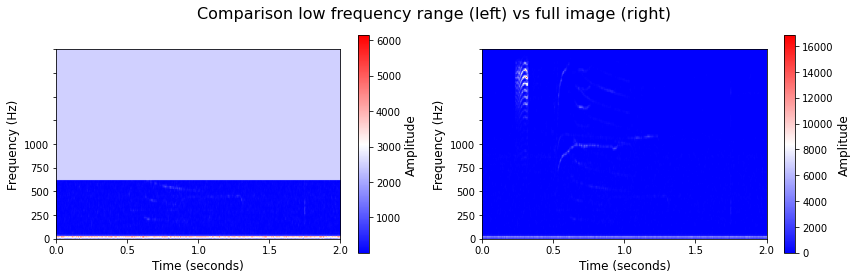

In [20]:

# Let's see what this means
R = Q.copy()
R[maxM:,:] = 2500
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
plot_spectrogram(ax1, R)
ax2 = plt.subplot(122)
plot_spectrogram(ax2, P)
plt.suptitle('Comparison low frequency range (left) vs full image (right)', fontsize = 16)
plt.show()

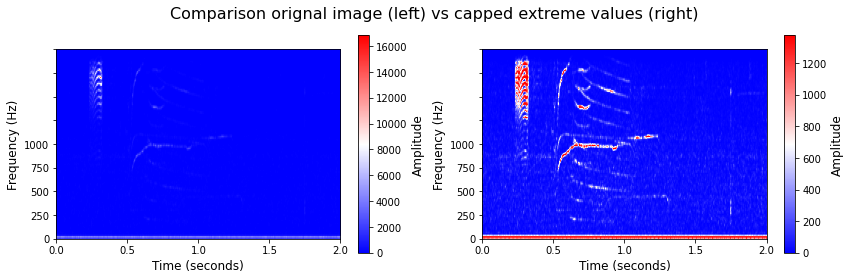

In [21]:
# Extreme values are capped to mean ± 1.5 std
fact_ = 1.5
Q[Q > mval + fact_*sval] = mval + fact_*sval
Q[Q < mval - fact_*sval] = mval - fact_*sval

# Let's see it
R = Q.copy()
R[maxM:,:] = 2500
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
plot_spectrogram(ax1, P)
ax2 = plt.subplot(122)
plot_spectrogram(ax2, Q)
plt.suptitle('Comparison orignal image (left) vs capped extreme values (right)', fontsize = 16)
plt.show()



In [23]:
inner=3
outer=64
wInner = np.ones(inner)
wOuter = np.ones(outer)

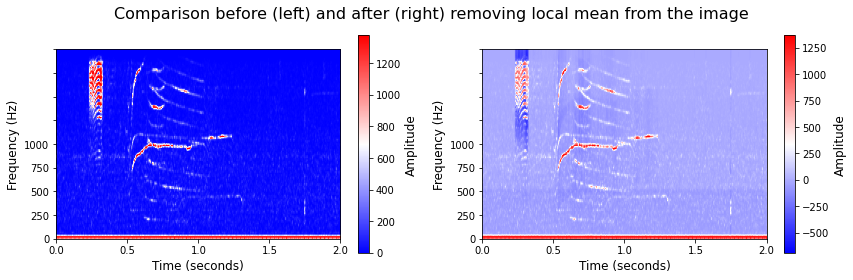

In [24]:


# The difference between sums of different windows (64 and 3) is subtracted from each element
R = Q.copy()
for i in range(n):
    Q[:,i] = Q[:,i] - (np.convolve(R[:,i],wOuter,'same') - np.convolve(R[:,i],wInner,'same'))/(outer - inner)
# Let's see it
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
plot_spectrogram(ax1, R)
ax2 = plt.subplot(122)
plot_spectrogram(ax2, Q)
plt.suptitle('Comparison before (left) and after (right) removing local mean from the image ', fontsize = 16)
plt.show()



In [37]:
import soundfile as sf
import argparse
import os
from pathlib import Path
#from preprocessing_script import selection_table
import soundfile as sf
import librosa
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
#from pydub import AudioSegment
from scipy import signal
from skimage.restoration import denoise_wavelet
data, sr = sf.read("/content/extracted_calls1.wav")
plot_power_spectral_density(data, sr, "file","/content/")
def plot_power_spectral_density(data,
                                samplerate,
                                f_name,
                                plot_path,
                                grayscale=False):
    """Plot power spectral density spectrogram

    Compute a spectrogram with consecutive Fourier transforms.

    Spectrograms can be used as a way of visualizing the
    change of a nonstationary signal’s frequency content over time.

    Args:
        data: Spectrgram data in the form of NumPy array.
        samplerate: Sampling rate
        f_name: The name of the audio file
        plot_path: The path to the directory where we want to plot the
                    spectrogram
        grayscale: The color map of the spectrogram

    Returns:
        None
    """

    f, t, spec = signal.spectrogram(data, samplerate)
    fig, ax = plt.subplots(1, 1)
    if grayscale:
        ax.specgram(data, Fs=samplerate, cmap="gray", NFFT=1024)
    else:
        ax.specgram(data, Fs=samplerate, NFFT=1024)
    scale_y = 1000
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    ax.yaxis.set_major_formatter(ticks_y)
    ax.set_axis_off()
    plt.savefig(os.path.join(
                plot_path,
                f_name[:-4] + ".png"))
    plt.imshow()

TypeError: ignored

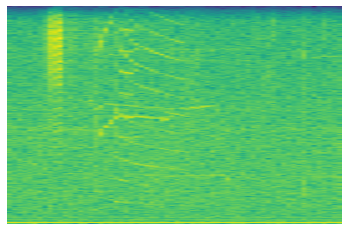

In [40]:
data, sr = sf.read("/content/extracted_calls1.wav")
f_name = os.path.basename("file")
spectrogram_data = librosa.feature.melspectrogram(
                                                      data,
                                                      sr=20000,
                                                      power=1)
plot_power_spectral_density(data, sr, "f_name", "/content/", grayscale=False)

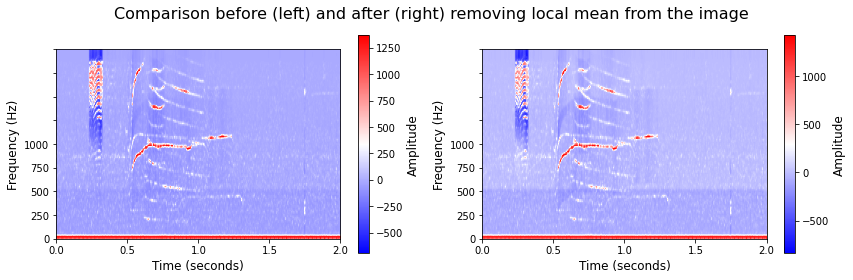

In [41]:



# The difference between sums of different windows (64 and 3) is subtracted from each element
R = Q.copy()
for i in range(n):
    Q[:,i] = Q[:,i] - (np.convolve(R[:,i],wOuter,'same') - np.convolve(R[:,i],wInner,'same'))/(outer - inner)
# Let's see it
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
plot_spectrogram(ax1, R)
ax2 = plt.subplot(122)
plot_spectrogram(ax2, Q)
plt.suptitle('Comparison before (left) and after (right) removing local mean from the image ', fontsize = 16)
plt.show()



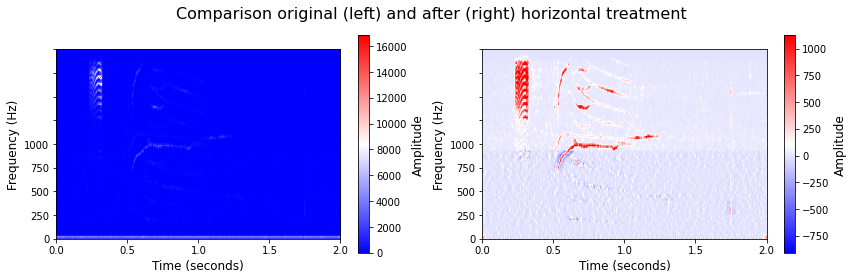

In [42]:
# Repeat the process horizontally
inner=3
outer=32
maxM=60
PH, freqs, bins = mlab.specgram(s, **params)
QH = PH.copy()
m, n = Q.shape

mval, sval = np.mean(QH[:maxM,:]), np.std(QH[:maxM,:])
fact_ = 1.5
QH[QH > mval + fact_*sval] = mval + fact_*sval
QH[QH < mval - fact_*sval] = mval - fact_*sval
wInner = np.ones(inner)
wOuter = np.ones(outer)
for i in range(maxM):
    QH[i,:] = QH[i,:] - (np.convolve(QH[i,:],wOuter,'same') - np.convolve(QH[i,:],wInner,'same'))/(outer - inner)

# Let's compare original with final
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
plot_spectrogram(ax1, PH)
ax2 = plt.subplot(122)
plot_spectrogram(ax2, QH)
plt.suptitle('Comparison original (left) and after (right) horizontal treatment ', fontsize = 16)
plt.show()



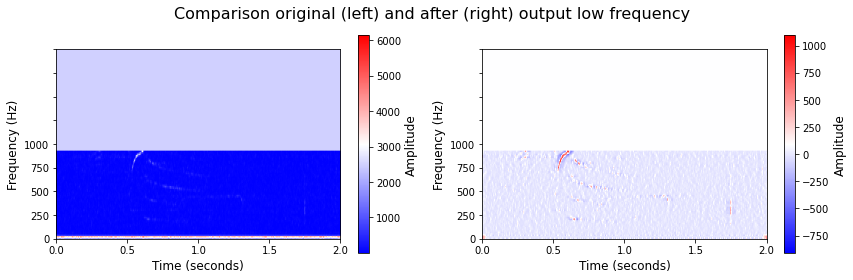

In [44]:
# Compare original vs output
PH2 = PH.copy()
QH2 = QH.copy()
PH2[maxM:, :] = 2500
QH2[maxM:, :] = 90
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
plot_spectrogram(ax1, PH2)
ax2 = plt.subplot(122)
plot_spectrogram(ax2, QH2)
plt.suptitle('Comparison original (left) and after (right) output low frequency ', fontsize = 16)
plt.show()

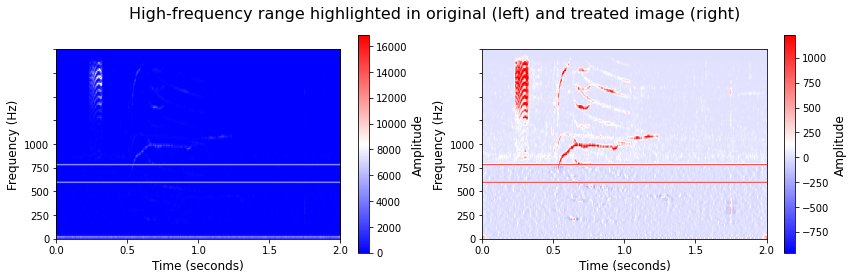

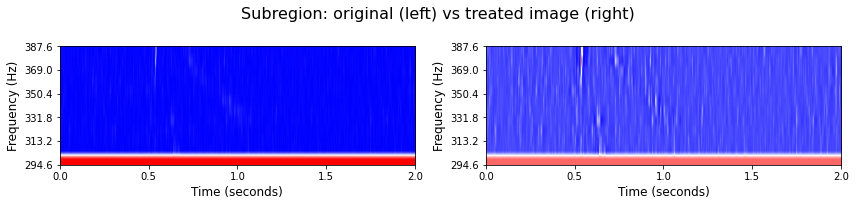

In [46]:
# ReadAIFF function
def ReadAIFF(file):
# Reads the frames from the audio clip and returns the uncompressed data
    s = aifc.open(file,'r')
    nFrames = s.getnframes()
    strSig = s.readframes(nFrames)
    return np.fromstring(strSig, np.short).byteswap()

def slidingWindowH(P,inner=3,outer=32,maxM=50,norm=True):
    Q = P.copy()
    m, n = Q.shape
    if norm:
        mval, sval = np.mean(Q[:maxM,:]), np.std(Q[:maxM,:])
        fact_ = 1.5
        Q[Q > mval + fact_*sval] = mval + fact_*sval
        Q[Q < mval - fact_*sval] = mval - fact_*sval
    wInner = np.ones(inner)
    wOuter = np.ones(outer)
    for i in range(maxM):
        Q[i,:] = Q[i,:] - (np.convolve(Q[i,:],wOuter,'same') - np.convolve(Q[i,:],wInner,'same'))/(outer - inner)
    return Q

# Function to allow code reusability
def plot_spectrogram(ax, P, y_axis, ex, cbar = True):
    im = plt.imshow(P, origin='lower', extent=ex, aspect=4, cmap = cm.get_cmap('bwr'))
    loc = plticker.MultipleLocator(base=3.0)
    ax.xaxis.set_major_locator(loc)
    ax.set_xticklabels(np.arange(-0.5,2.5,0.5))
    ax.set_yticklabels(y_axis)
    ax.set_xlabel('Time (seconds)', fontsize = 12)
    ax.set_ylabel('Frequency (Hz)', fontsize = 12)
    if cbar:
        cbar = plt.colorbar()
        cbar.set_label('Amplitude', fontsize = 12)

# Read one file as an example

P, freqs, bins = mlab.specgram(s, **params)

# Pre-process the image
maxM = 50
Q = slidingWindowH(P,inner=7,maxM=50,norm=True)

# Subset
P2 = P[38:maxM,:]
Q2 = Q[38:maxM,:]

# Border in original image
P[38,:], P[maxM,:] = 4500, 4500
Q[38,:], Q[maxM,:] = 900, 900

# Plot original with border around selected area
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
plot_spectrogram(ax1, P, range(0,1001,250), [-6,6,-1,1])
ax2 = plt.subplot(122)
plot_spectrogram(ax2, Q, range(0,1001,250), [-6,6,-1,1])
plt.suptitle('High-frequency range highlighted in original (left) and treated image (right)', fontsize = 16)
plt.show()

# New yaxis limits
y_min2 = 38 / 129.0 * 1000
y_max2 = maxM / 129.0 * 1000
step = (y_max2 - y_min2)/ 5.0

# Plot selected area, to feed teplate matching
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
plot_spectrogram(ax1, P2, 
                 [round(x, 1) for x in np.arange(y_min2, y_max2 + step, step)],
                 [-6,6,0,1], False)
ax2 = plt.subplot(122)
plot_spectrogram(ax2, Q2, 
                 [round(x, 1) for x in np.arange(y_min2, y_max2 + step, step)], 
                 [-6,6,0,1], False)
plt.suptitle('Subregion: original (left) vs treated image (right)', fontsize = 16)
plt.subplots_adjust(top=1.15)
plt.show()

 Max_val= 0.29


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


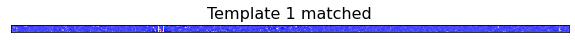

 Max_val= 0.30


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


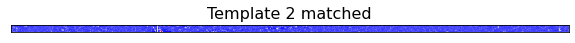

 Max_val= 0.19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


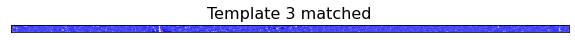

In [52]:
# Match template function
def match_template(template, P, temp_num):
    w, h = template.shape[::-1]
    Q = P.copy()
    # Set method 
    meth = 'cv2.TM_CCOEFF_NORMED'
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(Q,template,method)
    # Obtain vals and locs (max_lox corresponds to the best match)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print( ' Max_val= %.2f' % max_val)
    # Add rectangle with match
    bottom_right = (max_loc[0] + w, max_loc[1] + h)
    cv2.rectangle(Q,max_loc, bottom_right, 400, 1)
    
    # Plot matching and image with best match in rectangle
    plt.figure(figsize = (10,6))
    plt.imshow(Q, cmap = cm.get_cmap('bwr'), interpolation='nearest')
    plt.title('Template %d matched' % temp_num, fontsize = 16), plt.xticks([]), plt.yticks([])
    plt.show()

# Match the three templates in the above seen subregion
match_template(bar_, Q2.astype('Float32'), 1)    
match_template(bar1_, Q2.astype('Float32'), 2)
match_template(bar2_, Q2.astype('Float32'), 3)

In [51]:
import cv2

In [49]:
bar_ = np.zeros((12,9),dtype='Float32')
bar1_ = np.zeros((12,12),dtype='Float32')
bar2_ = np.zeros((12,6),dtype='Float32')
bar_[:,3:6] = 1.
bar1_[:,4:8] = 1.
bar2_[:,2:4] = 1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
